In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('AirPassengers.csv')

In [122]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [124]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [126]:
#Basic EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [128]:
#datetimes64(ns) ---it should 
#Month dTyoe is object---which is needed to convert to dateimes64(ns)---it should have contain string.
#ns---nanosecond

In [130]:
df["Month"] = pd.to_datetime(df["Month"]) # to fix the data type of month to its correct format.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [134]:
#Check for null values.
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [136]:
#Duplicates
df.duplicated().sum()

0

In [138]:
#We need to convert our datetime column to index(This is a another requirement of our time series model

In [140]:
df.set_index("Month",inplace = True)

In [142]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [144]:
Now we need to check do we have a stationary and non stationary data.
    stationary data = trend(long term data inc or dec )+ seasonality(regualr repeating the data) otherwise non stationary
     residual--> noise---> random fluctuation

SyntaxError: invalid syntax (1141705037.py, line 1)

In [146]:
#Non stationary data will show both trend and seasionality,
#Stationary data will not show trend and seasionality
#Non stationary  data = trend(long term data inc or dec )+ seasonality(regualr repeating the data) otherwise non stationary

In [148]:
# We need a stationary data so id we have Non-stationary data we will convert it ot stationary data.

<Axes: xlabel='Month'>

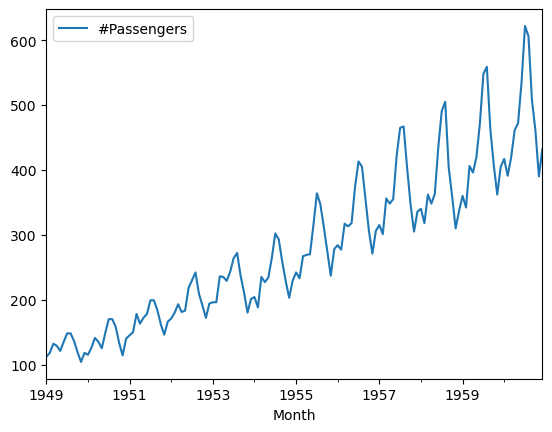

In [150]:
#Lets check the data is stationary or non stationary data.

# 1st option by using line plot.
df.plot()

In [152]:
#So, this  graph shows that our data have both  trend and seasionality.therefore this is non stationary data.

In [154]:
# df["#Passengers"].plot() # checking trend and seasionality in the Passengers columns.
# This is not required ---bcoz only one column we have.

Figure(640x480)


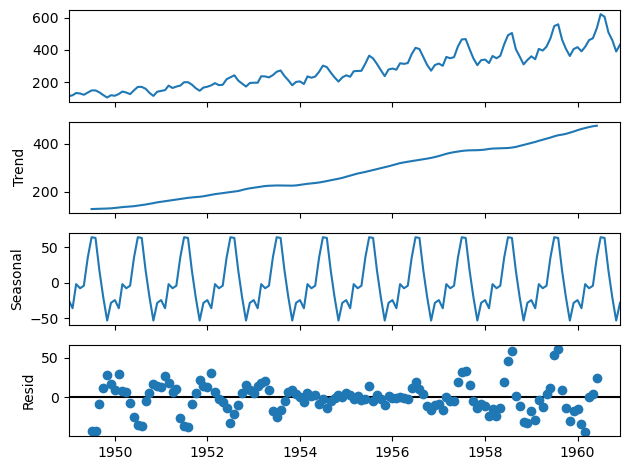

In [156]:
#2nd option is by using seasional decompose.
#this takes time series data as input and decompose it into three main components:
#Trend:
#Seasonality:
#Residual(Noise):

from statsmodels.tsa.seasonal import  seasonal_decompose
decomposed = seasonal_decompose(df)
print(decomposed.plot())

In [157]:
#Here,it shows that we have bith trend and sesionality in the data.
    

In [158]:
#3rd method--
#ADF--Augmented dicky fuller test
from statsmodels.tsa.stattools import adfuller # Augumented Dicky fuller test
result = adfuller(df)

In [159]:
result # we only need P_value which is present at index 1 of this result.
 # First value is T-test value,P_value ,percentage value.

(0.8153688792060547,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [164]:
 p_value = result[1]
p_value

0.9918802434376411

In [166]:
#Null hypothesis = Data is non_stationary
#Alternate hypothesis = Data is stationary.

if p_value is less than 0.05 = data is stationary.
if p value is more than 0.05 - data is non stationary.

SyntaxError: invalid syntax (1482148815.py, line 4)

In [168]:
if p_value < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")
    

Data is non-stationary


In [170]:
# Stationarity: A stationary time series has constant mean and varinace over time ,which is crucial for many time series
forecasting models.
As our data is non stationary we need to convert it to stationary form before model building.
To convert a non-stationary time series into a stationary one,we often use techniques that stabilize the mean and variance over time.
    1. Remove seasionality
    2. Remove trend

SyntaxError: invalid syntax (3875555812.py, line 2)

In [172]:
#How to remove:
1st step:
Logrithmic transformation
2nd Step:
Rolling
3rd step:
Differencing


SyntaxError: invalid decimal literal (3882863180.py, line 2)

In [174]:
#Logarithic transformation: Applying a logarithm to the data is a common techniue to stabilize the varinace(reduce
#heteroscedasticity ) and make the times series more stationary.This transformation compresses the scale of the data,
#especailly for large values,and is particularly useful when dealing with exponential growth trandes in time series data.
                        

In [176]:
first_log = np.log(df)

In [178]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [180]:
#Rolling Mean(Mean_log): This computes the moving average of the time series over a specified window (in this case,12 time periods).
#Its helps smooth out short_term fluctuations and highlights longer-term trends.

#Rolling Standard Deviation(std_log): Similarly ,this computes the moving standard deviation over the same window,
#showing how much variation exits around the rolling mean.


In [182]:
mean_log = first_log.rolling(window = 12).mean()

In [184]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [186]:
#First 12 values have null value---first 12 values have not the previous value to count---Basically we are finding the pair of 12 values.

In [188]:
#Differencing:
By subtracting the rolling mean from the log-transformed data,you are removing the trend component from the data.This
is a common technique in time series analysis to achive stationarity.

SyntaxError: invalid syntax (542107861.py, line 2)

In [190]:
new_data = first_log -mean_log
new_data = new_data.dropna() # we were having values so we will drop them.
new_data  #New stationary data.

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


<Axes: xlabel='Month'>

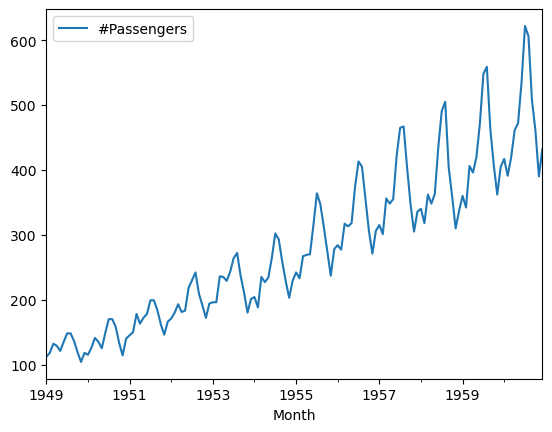

In [192]:
#check it : whether the data converted into stationary or not.
df.plot()

Figure(640x480)


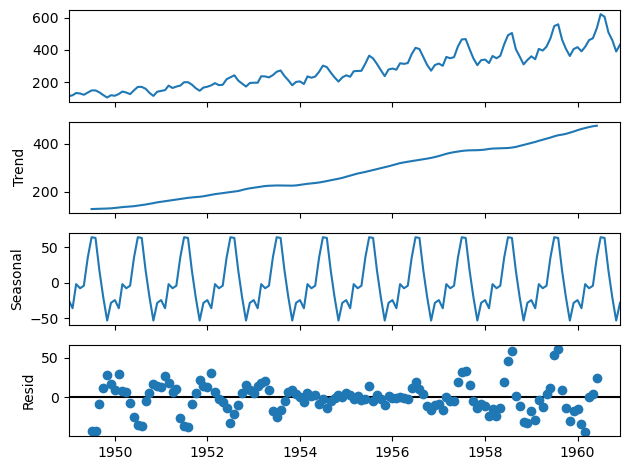

In [194]:
#lets check with 2 nd method.
from statsmodels.tsa.seasonal import  seasonal_decompose
decomposed = seasonal_decompose(df)
print(decomposed.plot())    

In [195]:
#Third method:
from statsmodels.tsa.stattools import adfuller # Augumented Dicky fuller test
result = adfuller(df)

In [198]:
result

(0.8153688792060547,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [200]:
p_value=result[1]
p_value
if p_value < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")
    

Data is non-stationary


In [202]:
#  Now ,lets make model building 

In [204]:
new_data
#Total we have 133 months.
#we need to divide this data for training data and testing data.
#Training data--120 months
#Testing data-- 13 months

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [206]:
train = new_data[0:120]["#Passengers"]
test =  new_data[120:]["#Passengers"]

In [208]:
train

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1959-07-01    0.316430
1959-08-01    0.327838
1959-09-01    0.128057
1959-10-01   -0.011315
1959-11-01   -0.141406
Name: #Passengers, Length: 120, dtype: float64

In [210]:
#1st model:
#Arima Model:Autoregression integrated Moving Average
    #Arima-(p,d,q)
    #P -order of lag,p=?
    #d - degree of difference d = 1
    #q - order of moving average q = ?
'''
    P: How many past values you want to use for prediction.
    d: How many times you need to subtract past values to make the data steady.
    q: Hpw many past errors you want to use to impove your predictions.
'''

#differencing done one times: d = 1
#we need to find and p and q values
#we hyperparameter tuning:
#some random p d values

'\n    P: How many past values you want to use for prediction.\n    d: How many times you need to subtract past values to make the data steady.\n    q: Hpw many past errors you want to use to impove your predictions.\n'

In [232]:
from statsmodels.tsa.arima.model import ARIMA 
#Training my arima model
arima_model = ARIMA(train , order = (5,1,6))
arima_model = arima_model.fit()
#Make Prediction for 13 testing values
new_data["Predicted_Passengers_values_column"] = arima_model.predict(start = len(train), end = len(train) + len(test)-1)

#Now we will compare the Actual value 13 testing values vs Predicted 13 values.
new_data

C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,#Passengers,Predicted_values_column,Predicted_Passengers_values_column
Month,,,
1949-12-01,-0.065494,NaN,NaN
1950-01-01,-0.093449,NaN,NaN
1950-02-01,-0.007566,NaN,NaN
1950-03-01,0.099416,NaN,NaN
1950-04-01,0.052142,NaN,NaN
...,...,...,...
1960-08-01,0.282363,0.318610,0.232797
1960-09-01,0.098235,0.131690,0.171563
1960-10-01,-0.009230,-0.014748,0.085350


In [214]:
# I need to start making predict for last 13 values.
#Training data have values from index 0 to 119 =Total 120 values
#Testing data will have values from index 120 to 13= Total 13 values

#Start point of making prediction will be index = 120
#End point of making prediction will be 133.

<Axes: xlabel='Month'>

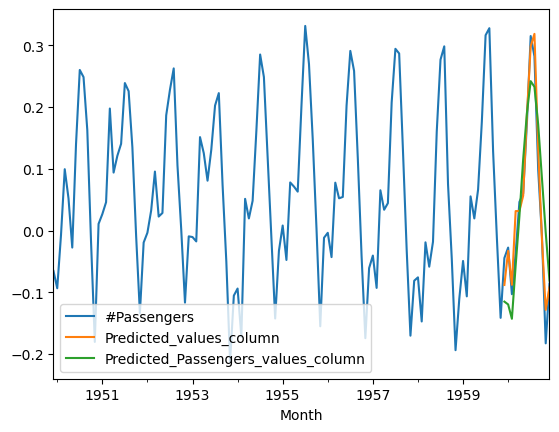

In [234]:
new_data.plot()

In [228]:
#lets check more giving order number: 

arima_model = ARIMA(train , order = (12,1,10))
arima_model = arima_model.fit()
#Make Prediction for 13 testing values
new_data["Predicted_Passengers_values_column"] = arima_model.predict(start = len(train), end = len(train) + len(test)-1)

#Now we will compare the Actual value 13 testing values vs Predicted 13 values.
new_data

C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization faile

,#Passengers,Predicted_values_column,Predicted_Passengers_values_column
Month,,,
1949-12-01,-0.065494,NaN,NaN
1950-01-01,-0.093449,NaN,NaN
1950-02-01,-0.007566,NaN,NaN
1950-03-01,0.099416,NaN,NaN
1950-04-01,0.052142,NaN,NaN
...,...,...,...
1960-08-01,0.282363,0.318610,0.318610
1960-09-01,0.098235,0.131690,0.131690
1960-10-01,-0.009230,-0.014748,-0.014748


<Axes: xlabel='Month'>

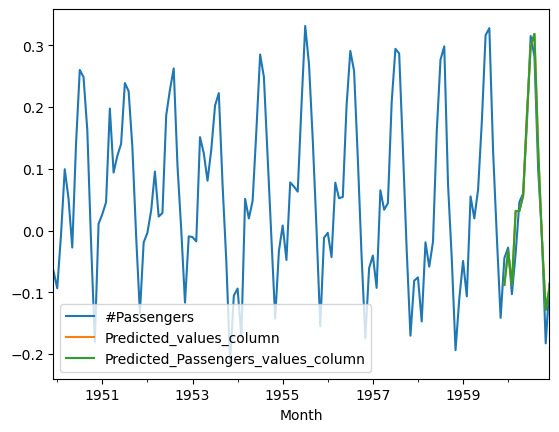

In [230]:
new_data.plot()

In [244]:
#Now to find the optimal value of p,d,q we will use itertools.
import itertools 
p = range(0,15) # from 0  to  15 p values i wil try.
d = range(1,2)
q = range(0,15) # from 0  to  15 q values i wil try.

# I  will create some combination of pdq by using different different value combination
pdq = list(itertools.product(p,d,q))
# I will use rmse to check with pdq values gives how much error btw actual and predicted values.
rmse = []
#I will use a list to store which pdq i used to find that rmse score.
order_list = []

for i in pdq: # with different combination of pdq I will multiple models and i will check model gives me leats rmse.
    arima_model = ARIMA (train,order = i)
    arima_model = arima_model.fit()
    pred = arima_model.predict(start = len(train),end=len(train)+len(test)-1)
    from sklearn.metrics import *
    error = np.sqrt(mean_squared_error(test,pred)) # find rmse
    order_list.append(i) #Add pqd combination of this model to list
    rmse.append(error) # Add error of this model to list

    #Create a dataframe that will lowest rmse and its pdq value
    result = pd.DataFrame(index = order_list,data = rmse ,columns = ["RMSE"])
    result.sort_values(by = "RMSE",ascending = True)
    result
    


C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [248]:
result  # we will change the vlaue of p and  q --- 0 to 7 

,RMSE
"(0, 1, 0)",0.228469
"(0, 1, 1)",0.252661
"(0, 1, 2)",0.140613
"(0, 1, 3)",0.140137
"(0, 1, 4)",0.136974
...,...
"(14, 1, 10)",0.032532
"(14, 1, 11)",0.031846
"(14, 1, 12)",0.029094
"(14, 1, 13)",0.030523


In [266]:
#Sarimax (seasoonal auto regression integrated Moving average with exogenous factors )
# is an advanced time series forecasting model that extends the ARIMA model.
from statsmodels.tsa.statespace.sarimax import SARIMAX
model =  SARIMAX(train,order = (6,1,6), seasonal_order =(14,1,14,12)) # this extra 12 is the window size.
model = model.fit()
# Make prediction for 13 testing values
new_data["Predicted_Passengers_values_column_by_SARIMAX"] = model.predict(start = len(train), end = len(train)+len(test)-1)
#Now we will compare the Actual 13 testing values vs Predicted 13 Values
new_data

C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,#Passengers,Predicted_values_column,Predicted_Passengers_values_column,Predicted_Passengers_values_column_by_SARIMAX
Month,,,,
1949-12-01,-0.065494,NaN,NaN,NaN
1950-01-01,-0.093449,NaN,NaN,NaN
1950-02-01,-0.007566,NaN,NaN,NaN
1950-03-01,0.099416,NaN,NaN,NaN
1950-04-01,0.052142,NaN,NaN,NaN
...,...,...,...,...
1960-08-01,0.282363,0.318610,0.232797,0.306187
1960-09-01,0.098235,0.131690,0.171563,0.096059
1960-10-01,-0.009230,-0.014748,0.085350,-0.022108


In [265]:
new_data

,#Passengers,Predicted_values_column,Predicted_Passengers_values_column,Predicted_Passengers_values_column_by_SARIMAX
Month,,,,
1949-12-01,-0.065494,NaN,NaN,NaN
1950-01-01,-0.093449,NaN,NaN,NaN
1950-02-01,-0.007566,NaN,NaN,NaN
1950-03-01,0.099416,NaN,NaN,NaN
1950-04-01,0.052142,NaN,NaN,NaN
...,...,...,...,...
1960-08-01,0.282363,0.318610,0.232797,0.306187
1960-09-01,0.098235,0.131690,0.171563,0.096059
1960-10-01,-0.009230,-0.014748,0.085350,-0.022108


<Axes: xlabel='Month'>

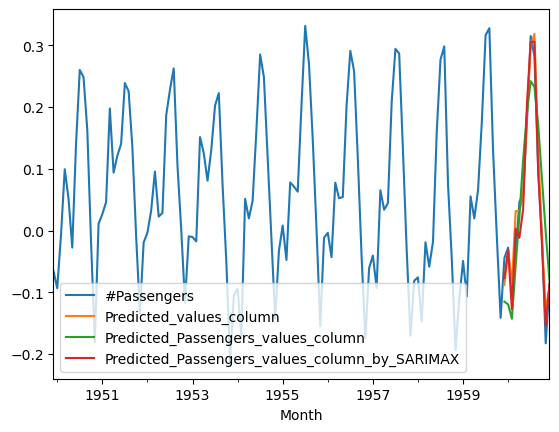

In [270]:
new_data.plot()

<Axes: xlabel='Month'>

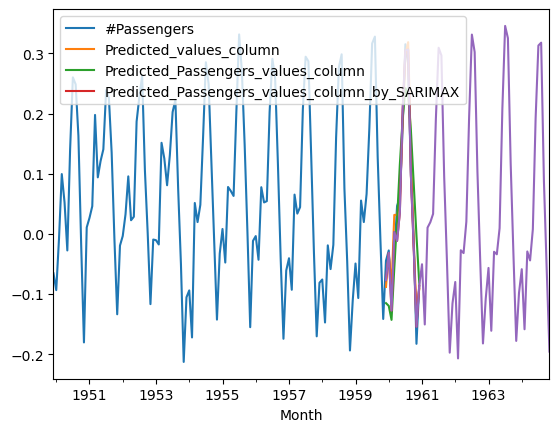

In [272]:
 # we got out final model that is SARIMAX best for this data.
#Now we can use this model for forecast the value for some upcoming months.
# We were having till december 1960 so we will forecast for next 5 years (next 6 m months ) also 
future = model.forecast(steps = 60)
new_data.plot()
future.plot()

In [274]:
future

1959-12-01   -0.076788
1960-01-01   -0.031614
1960-02-01   -0.127481
1960-03-01    0.003109
1960-04-01   -0.011747
1960-05-01    0.035236
1960-06-01    0.204403
1960-07-01    0.305032
1960-08-01    0.306187
1960-09-01    0.096059
1960-10-01   -0.022108
1960-11-01   -0.154265
1960-12-01   -0.086090
1961-01-01   -0.050454
1961-02-01   -0.150560
1961-03-01    0.010445
1961-04-01    0.019375
1961-05-01    0.033218
1961-06-01    0.190495
1961-07-01    0.309346
1961-08-01    0.296485
1961-09-01    0.095164
1961-10-01   -0.045179
1961-11-01   -0.197381
1961-12-01   -0.115545
1962-01-01   -0.079937
1962-02-01   -0.206964
1962-03-01   -0.027202
1962-04-01   -0.031934
1962-05-01    0.020260
1962-06-01    0.193950
1962-07-01    0.331216
1962-08-01    0.302182
1962-09-01    0.103786
1962-10-01   -0.043739
1962-11-01   -0.182104
1962-12-01   -0.107461
1963-01-01   -0.056586
1963-02-01   -0.160997
1963-03-01   -0.029705
1963-04-01   -0.033936
1963-05-01    0.009517
1963-06-01    0.208283
1963-07-01 

In [ ]:
#How to get the no of passengers.
Build the arima model and convert the stationary data into 
# The process is reverse transformation to get the actual passengers numbers.